In [9]:
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
import pylab as p
from scipy.spatial import ConvexHull
from sklearn import datasets


data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()


(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


No handles with labels found to put in legend.


[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]]
[[7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6

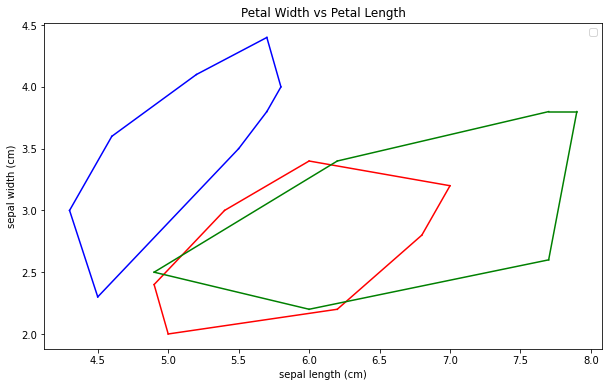

In [11]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

# print(data.target_names)

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    # print(bucket)
    # ini buat ngambil kolom di dataset nya
    bucket = bucket.iloc[:,[0,1]].values 
    print(bucket)   
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi
                                # ConvexHull Divide & Conquer
    # plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    # ini buat warnain convex hull nya
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

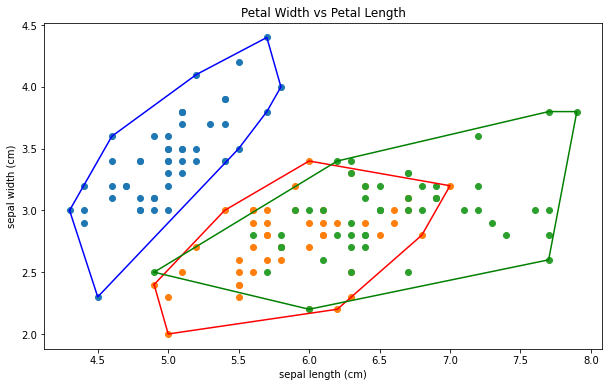

In [20]:
from ConvexHull import myConvexHull 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

model = myConvexHull()

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    
    bucket = bucket.iloc[:,[0,1]].values   
    
    hull = model(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    # ini buat warnain convex hull nya
    # for simplex in hull.simplices:
    #     plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    hull = np.vstack([hull, hull[0]])
    plt.plot(hull[:,0], hull[:,1], colors[i])
plt.show()